# BoomBikes - Multiple Linear Regression Model

## Problem Statement
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data
1. Here we will be importing important libraries and will try to Understanding the structure of the data its columns sets and row of data.

2. We will check the data using general function like head, shape and info to get general inforamtion of the data

In [89]:
# Supress Any Warnings Generated for Better Visualization

import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# Read the given CSV file

day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
#1. If you see the columns you can makeout the columns that will be used as input or are the 
# factors that will be used to identify the result that is the cnt column
#2. inshort we can are able to identify the varaiables X and y from the above view


In [41]:
day.shape

(730, 16)

In [42]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [43]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [44]:
day.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [45]:
pd.set_option('display.max_rows', None)
df_null_percent=100*day.isnull().mean()
df_null_percent

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## General Details
1. The data set contains 16 columns and 730 rows in total
2. There are no null values in any columns
3. Based on the Dataset characteristics we can say that column cnt is out result column (y)
4. Columns [season ,yr ,mnth ,holiday ,weekday ,workingday ,weathersit ] can be marked as categorical columns
5. Few of the columns data type need to be corrected ,that we will be doing in the next step

In [46]:
# There are no row which has null values so its fine

## Step 2: Data Cleaning , Formating and Column Separation Based on Function

### We see that there are some columns where the data type needs to be updates. Also we can create new columns to enable proper data analysis (eg : Date to month and years etc)

In [47]:
#converting object datatype to date type for column dteday

#While converting object to date the month and day is getting exchanged no instead of converting to date we will convert to
#string and will extract the day in next step as month and year is already present
#day["dteday"] = day["dteday"].apply(pd.to_datetime)
#day['dteday'] = pd.to_datetime(day['dteday'])
#day['dteday'] = day['dteday'].dt.date

day['dteday'] = day['dteday'].astype("string")

#converting int datatype to string 
day["yr"] = day["yr"].astype("string")
day["mnth"] = day["mnth"].astype("string")
day["weekday"] = day["weekday"].astype("string")
day["season"] = day["season"].astype("string")
day["weathersit"] = day["weathersit"].astype("string")

In [48]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [49]:
#Column yr : year (0: 2018, 1:2019)
#replace the value 0 and 1 with actual year for simplicity
def updateyear(yr):
    if yr=="0":
        return "2018"
    elif yr=="1":
        return "2019"
    else:
        return "Others"
    
day["yr"] = [ updateyear(row["yr"]) for index, row in day.iterrows()]
day["yr"]=day["yr"].astype("string")

In [50]:
#Column mnth : month ( 1 to 12)
# replace 1 with Jan , 2 with Feb etc

def updatemonth(mt):
    if mt=="1":
        return "jan"
    elif mt=="2":
        return "feb"
    elif mt=="3":
        return "mar"
    elif mt=="4":
        return "apr"
    elif mt=="5":
        return "may"
    elif mt=="6":
        return "jun"
    elif mt=="7":
        return "jul"
    elif mt=="8":
        return "aug"
    elif mt=="9":
        return "sep"
    elif mt=="10":
        return "oct"
    elif mt=="11":
        return "nov"
    elif mt=="12":
        return "dec"
    else:
        return "Other"

day["mnth"] = [ updatemonth(row["mnth"]) for index, row in day.iterrows()]
day["mnth"]=day["mnth"].astype("string")

In [51]:
#Column weekday : day of the week
# if you analysis the data in weekday column and compare it with the actual column then you will find that the day 0 ,
# starts with tue, so tue =0, wed=1, thur=2, fri=3, sat=4, sun=5, mon=6 but then it contractdict with column working day so, 
# we will keep the general believe that week starts with sun, as sat and sun has 0 value for working day,
# thus sat =6 sun =0 and so on

def updateweekday(d):
    if d=="1":
        return "mon"
    elif d=="2":
        return "tue"
    elif d=="3":
        return "wed"
    elif d=="4":
        return "thur"
    elif d=="5":
        return "fri"
    elif d=="6":
        return "sat"
    elif d=="0":
        return "sun"
    else:
        return "Other"
    
day["weekday"] = [ updateweekday(row["weekday"]) for index, row in day.iterrows()]
day["weekday"]=day["weekday"].astype("string")

In [52]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)

def updateseason(s):
    if s=="1":
        return "spring"
    elif s=="2":
        return "summer"
    elif s=="3":
        return "fall"
    elif s=="4":
        return "winter"
    else:
        return "Other"
    
day["season"] = [ updateseason(row["season"]) for index, row in day.iterrows()]
day["season"]=day["season"].astype("string")

In [53]:
#weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy [clear]
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist [mist_fewcloud]
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds[light_rain_mediumcloud]
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog [heavyrain_snow]

def updateweather(s):
    if s=="1":
        return "clear"
    elif s=="2":
        return "mist_fewcloud"
    elif s=="3":
        return "light_rain_mediumcloud"
    elif s=="4":
        return "heavyrain_snow"
    else:
        return "Other"
    
day["weathersit"] = [ updateweather(row["weathersit"]) for index, row in day.iterrows()]
day["weathersit"] = day["weathersit"].astype("string")

In [54]:
#Create new column day and extract the day part of the date from the dteday column
#day["dayno"]= day['dteday'].apply(lambda r:r.day)

day["day"]=[ row["dteday"][:2] for index, row in day.iterrows()]
day["day"]=day["day"].astype("string")

In [55]:
#Rounding columns temp,atemp,hum,windspeed to 2 decimal places 

day["temp"]=round(day["temp"],2)
day["atemp"]=round(day["atemp"],2)
day["hum"]=round(day["hum"],2)
day["windspeed"]=round(day["windspeed"],2)

In [56]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    string 
 2   season      730 non-null    string 
 3   yr          730 non-null    string 
 4   mnth        730 non-null    string 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    string 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    string 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  day         730 non-null    string 
dtypes: float64(4), int64(6), string(7)
memory usage: 97.1 KB


In [57]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,spring,2018,jan,0,sat,0,mist_fewcloud,14.11,18.18,80.58,10.75,331,654,985,01
1,2,02-01-2018,spring,2018,jan,0,sun,0,mist_fewcloud,14.90,17.69,69.61,16.65,131,670,801,02
2,3,03-01-2018,spring,2018,jan,0,mon,1,clear,8.05,9.47,43.73,16.64,120,1229,1349,03
3,4,04-01-2018,spring,2018,jan,0,tue,1,clear,8.20,10.61,59.04,10.74,108,1454,1562,04
4,5,05-01-2018,spring,2018,jan,0,wed,1,clear,9.31,11.46,43.70,12.52,82,1518,1600,05


## Step 3: Dividing the data into categorical ,contineous and other sections

Now we will separate the columns in to categorical , contineous and other sub section. Where others will be removed and the final data set will be ready to use

In [58]:
cat=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
cont=["temp","atemp","hum","windspeed"]
#we have not included cnt in the contineous list as its our output
other=["instant","dteday","casual","registered","day"]

In [59]:
# here we can remove the other sub section as its not needed anymore
day.drop(other, axis=1,inplace=True)

In [60]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,mist_fewcloud,14.11,18.18,80.58,10.75,985
1,spring,2018,jan,0,sun,0,mist_fewcloud,14.90,17.69,69.61,16.65,801
2,spring,2018,jan,0,mon,1,clear,8.05,9.47,43.73,16.64,1349
3,spring,2018,jan,0,tue,1,clear,8.20,10.61,59.04,10.74,1562
4,spring,2018,jan,0,wed,1,clear,9.31,11.46,43.70,12.52,1600


## Step 4: Visualising the Data

Now we will be visualising the data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `cnt`.

In [61]:
#General Visualising the data
#sns.pairplot(day)
#plt.show()

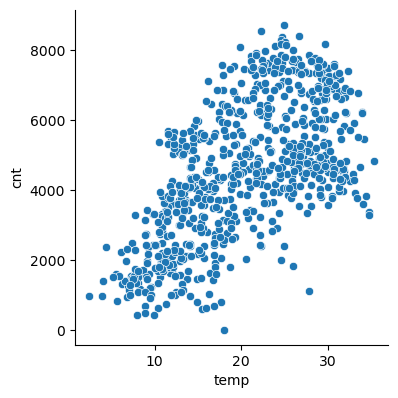

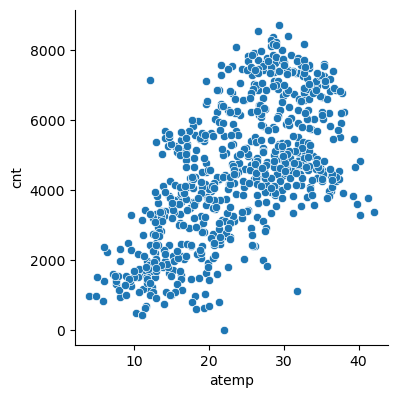

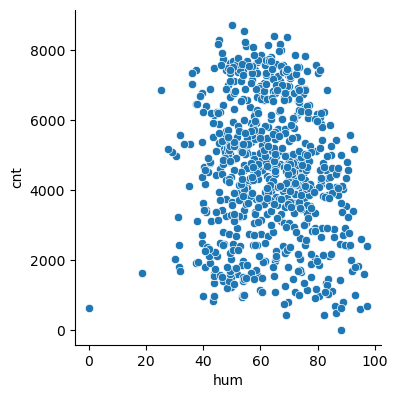

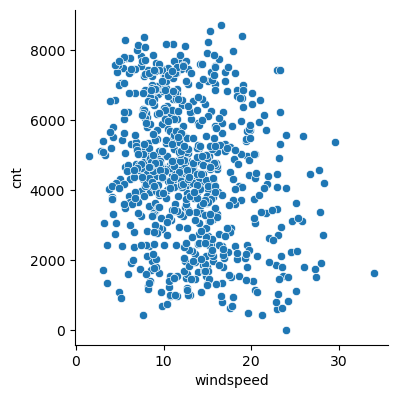

In [62]:
#checking contineous data 
for col1 in cont:
    sns.pairplot(day, x_vars=col1, y_vars='cnt',size=4, aspect=1, kind='scatter')
    plt.show()

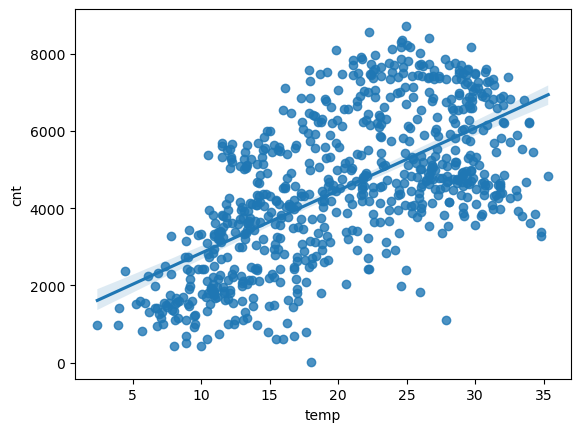

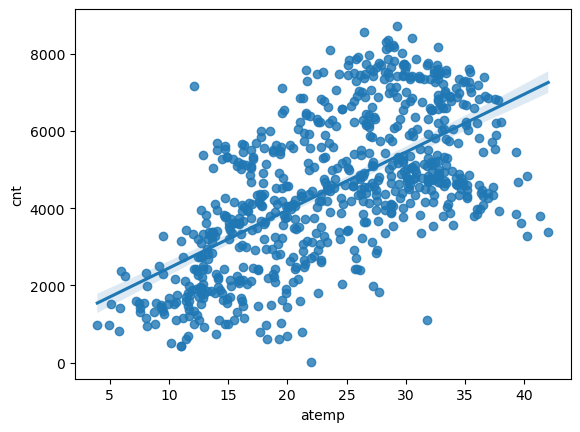

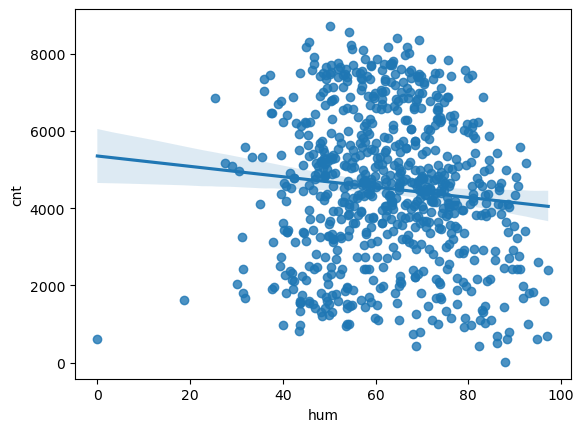

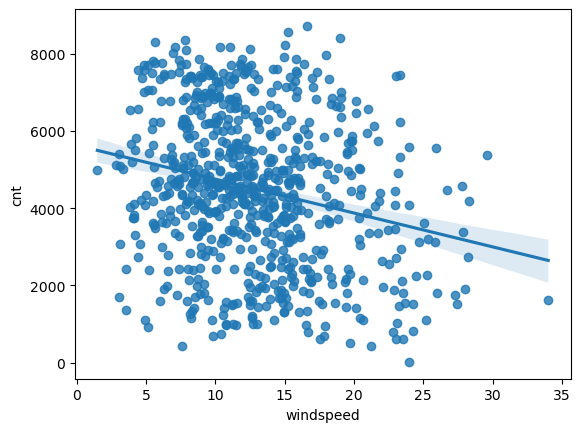

In [63]:
for col1 in cont:
    sns.regplot(data=day, x=col1, y='cnt')
    plt.show()

In [64]:
day.corr()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
holiday,1.000000,-0.252948,-0.028760,-0.032696,-0.015660,0.006254,-0.068764
workingday,-0.252948,1.000000,0.053482,0.052916,0.023205,-0.018661,0.062542
temp,-0.028760,0.053482,1.000000,0.991694,0.128554,-0.158173,0.627046
atemp,-0.032696,0.052916,0.991694,1.000000,0.141526,-0.183895,0.630694
hum,-0.015660,0.023205,0.128554,0.141526,1.000000,-0.248535,-0.098538
windspeed,0.006254,-0.018661,-0.158173,-0.183895,-0.248535,1.000000,-0.235152
cnt,-0.068764,0.062542,0.627046,0.630694,-0.098538,-0.235152,1.000000


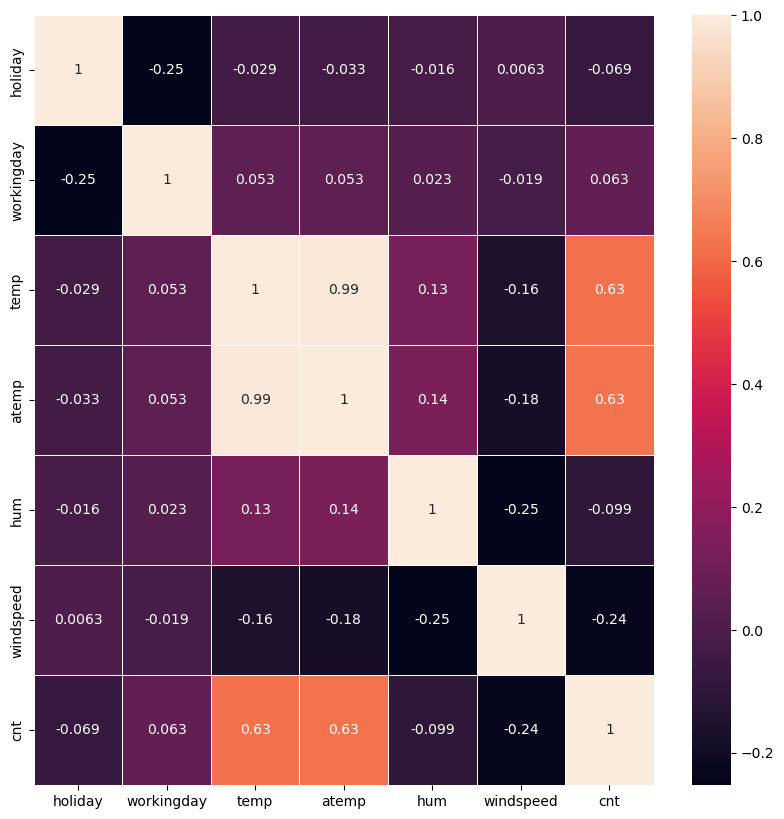

In [65]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(day.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

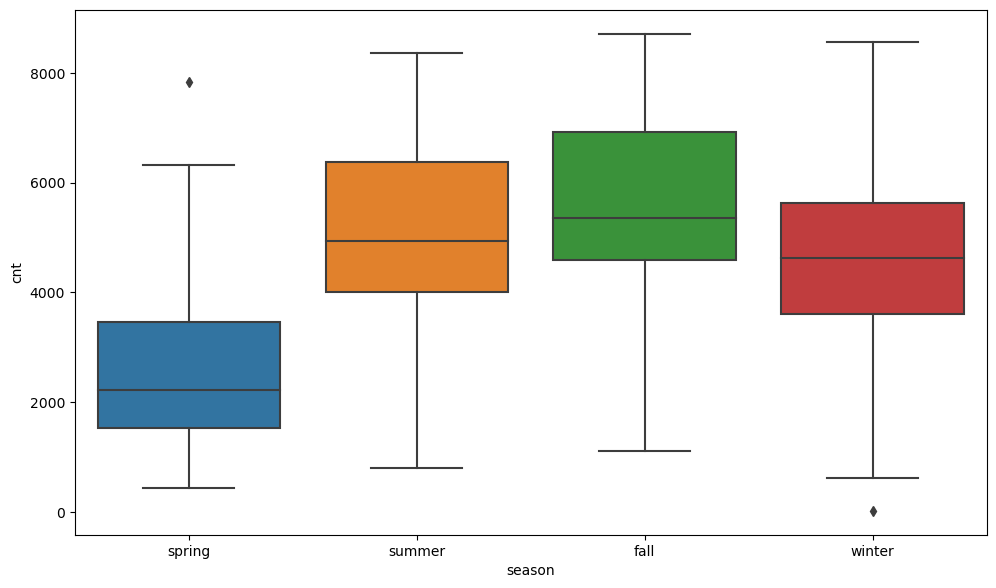

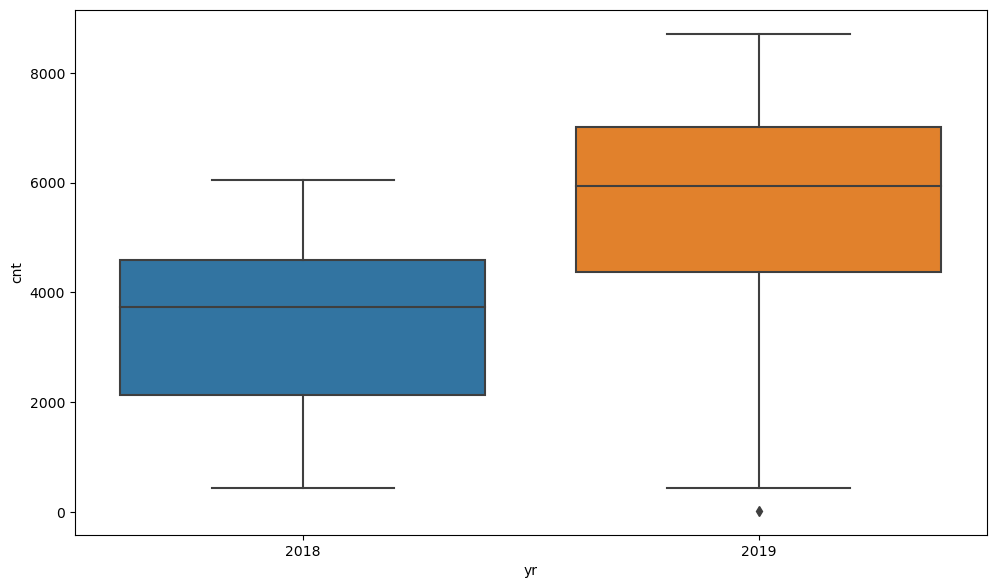

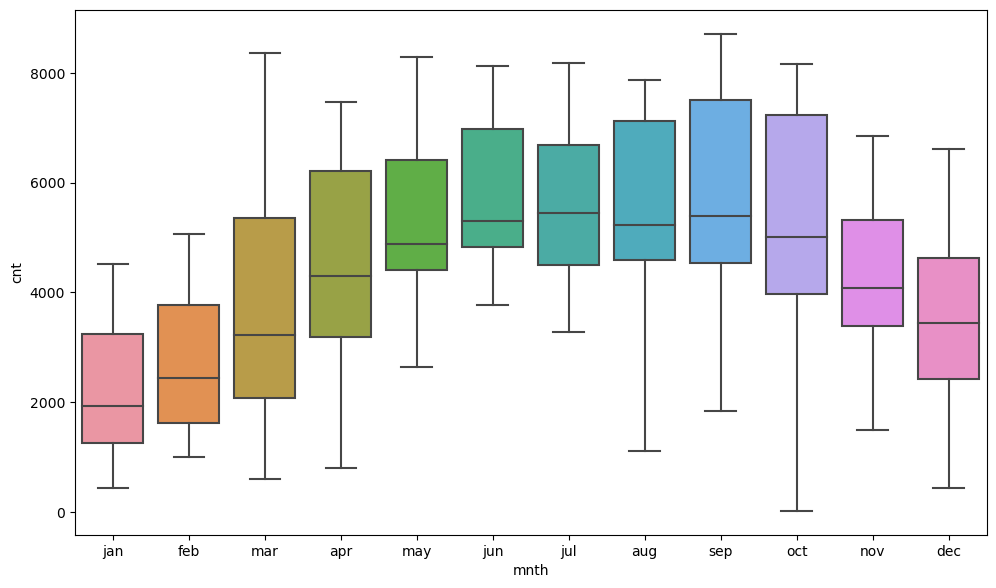

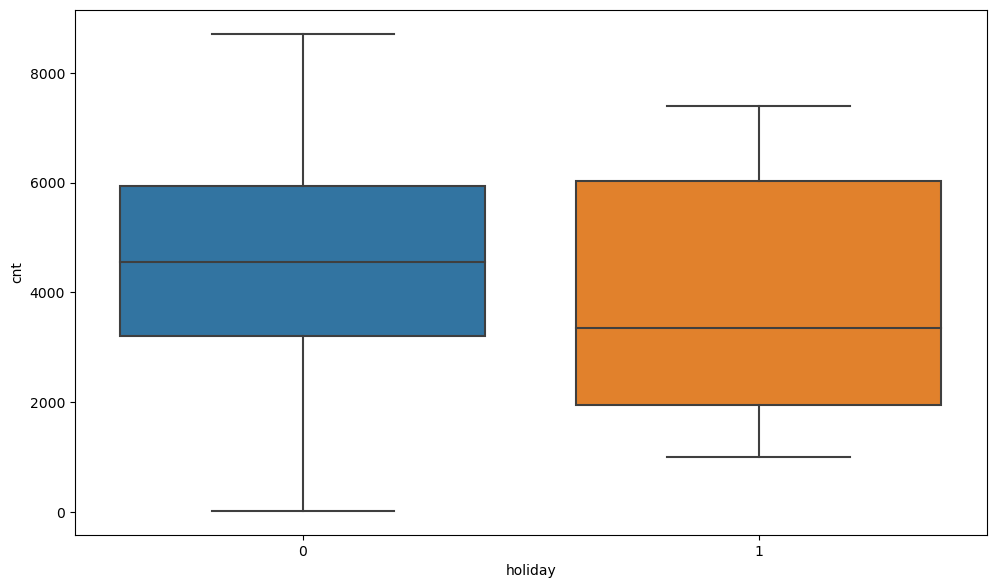

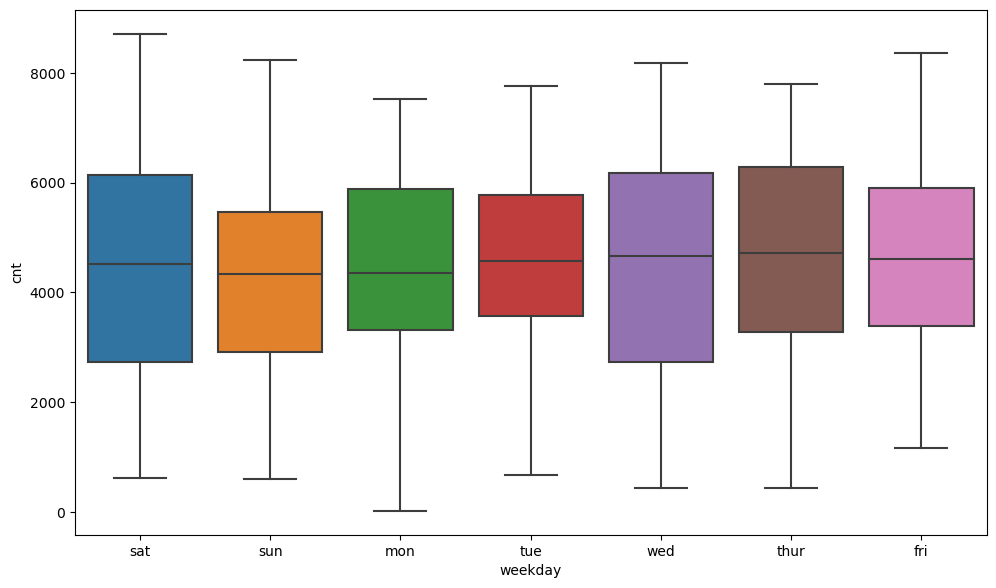

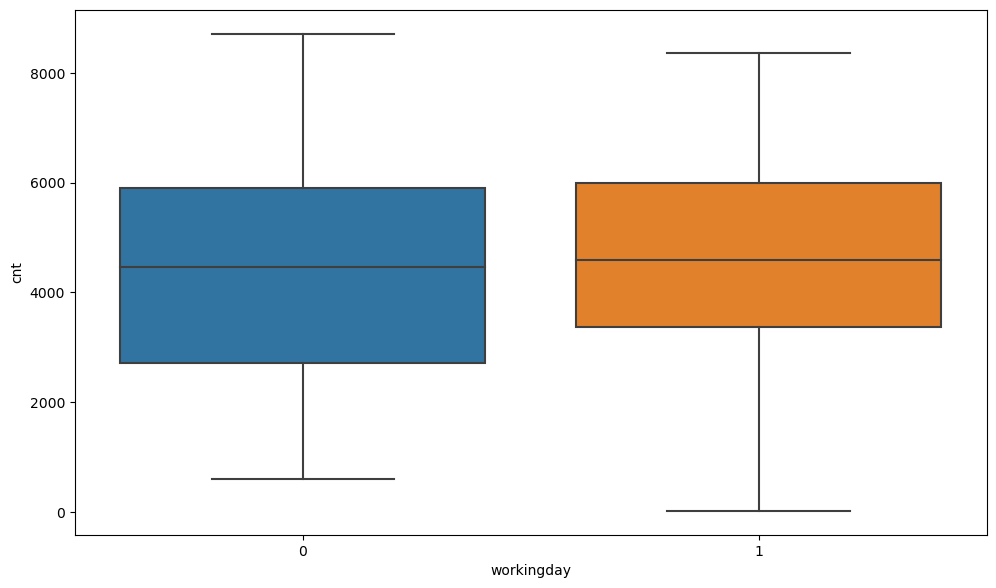

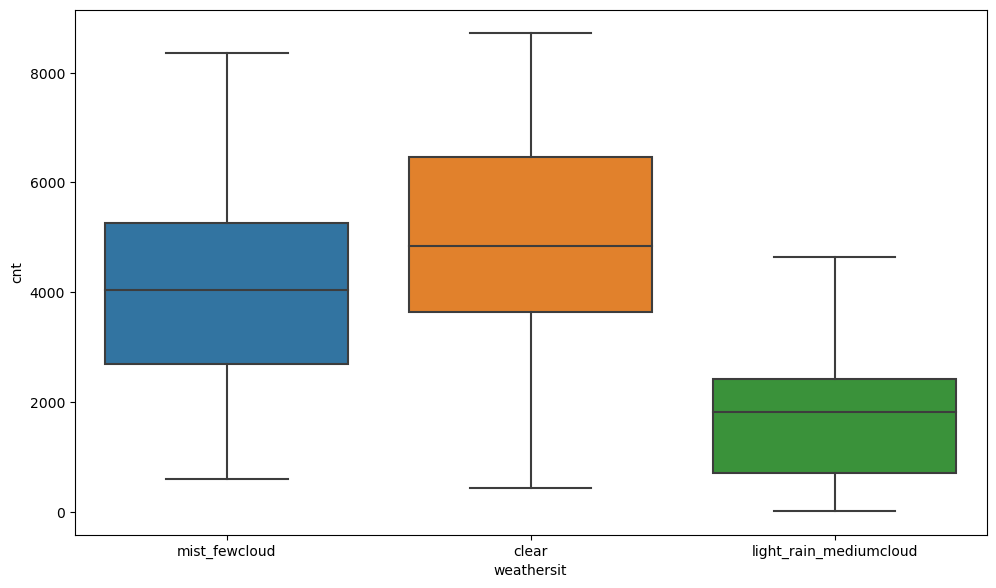

In [66]:
#General Categorical the data
for col1 in cat:
    plt.figure(figsize=(40,15))
    plt.subplot(2,3,1)
    sns.boxplot(data=day, x=col1, y='cnt')
    plt.show()

## Step 5: Creating Dummy varaiables for categorical columns

- As we have mentoned before these are the categorical columns for which we need to create the dummy columns 
- We have already assigned the correct values to these so that when the dummy variables are created, it will contain the proper name
- ["season","yr","mnth","weekday","weathersit","day"]
- ["holiday","workingday"] are already in the binary format so its fine

In [67]:
# Season column 
season=pd.get_dummies(day["season"],drop_first=True)
season.head()

#day=day.concat([day,season],axis=1)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [68]:
#yr column
yr=pd.get_dummies(day["yr"],drop_first=True)
yr.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [69]:
#mnth column
mnth=pd.get_dummies(day["mnth"],drop_first=True)
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [70]:
#weekday column
weekday=pd.get_dummies(day["weekday"],drop_first=True)
weekday.head()

,mon,sat,sun,thur,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [71]:
#weathersit column
weathersit=pd.get_dummies(day["weathersit"],drop_first=True)
weathersit.head()

,light_rain_mediumcloud,mist_fewcloud
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [72]:
#day column

#day_cols=pd.get_dummies(day["day"],drop_first=True)
#day_cols.head()

#we have dropped day column as we have found not significant use of this in the analysis

### Concatinating the dummy columns to the main dataframe

In [73]:
day=pd.concat([day,season,yr,mnth,weekday,weathersit],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
0,spring,2018,jan,0,sat,0,mist_fewcloud,14.11,18.18,80.58,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,jan,0,sun,0,mist_fewcloud,14.90,17.69,69.61,...,0,0,0,0,1,0,0,0,0,1
2,spring,2018,jan,0,mon,1,clear,8.05,9.47,43.73,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,jan,0,tue,1,clear,8.20,10.61,59.04,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,jan,0,wed,1,clear,9.31,11.46,43.70,...,0,0,0,0,0,0,0,1,0,0


### Removing the old varaibles from the main dataframe

In [74]:
day.drop(["season","yr","mnth","weekday","weathersit"], axis=1,inplace=True)
day.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
0,0,0,14.11,18.18,80.58,10.75,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.90,17.69,69.61,16.65,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.05,9.47,43.73,16.64,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.20,10.61,59.04,10.74,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.31,11.46,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


---
## Step 6: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generate Steps To Create Model
- Create X and y ( X is in capitals as it will be a data frame of multiple columns)
- Create train and test sets by dividing the data into 80-30 or 80-20 ratio respectively
- Train your model on the training set (learn the coefficients)
- Evaluate the model with test set

In [75]:
#we will split the data into train set sub set here we will be doing 70-30 separation
#from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [76]:
df_train.shape

(510, 30)

In [77]:
df_test.shape

(219, 30)

### Rescaling The Features

- Rescaling is not important when doing simple linear regression but is a must for multiple linear regression models

- Note: Since each varaible has diffferent scale the coefficients will also differ and can be more as compared to others that is the reason we use rescalling as it will make it easily to interpret the data also if we rescale it with a small range the optimization logic becomes much faster.

- Here we will be using min-max rescalling that will scale the data between 0 and 1
- Columns ["holiday","workingday"] dont need scalling as its already in binary format

In [78]:
#Formulae  :  normalisation : (x-xmin)/(xmax- xmin)
#1 Instantiate an object
scaler=MinMaxScaler()

# Create a list of numeric variables only (excluding binary columns as mentined above )
#['temp', 'atemp', 'hum', 'windspeed', 'cnt','spring', 'summer', 'winter', '2019', 'aug', 'dec', 'feb', 'jan', 'jul',
#'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thur','tue', 'wed', 'light_rain_mediumcloud', 'mist_fewcloud']


num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#2 Fit on data
 # fit() - it will learn the max and min values (computes the max and min)
 # transform() -  after fit it is called to perform the operation x-xmin/xmax-xmin
 
 # fit_transform() - here both the above are done in a single go

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
653,0,1,0.509875,0.501181,0.575330,0.300930,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815254,0.766343,0.725680,0.264678,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442419,0.438960,0.640148,0.255374,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245214,0.200315,0.498042,0.663138,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395624,0.391966,0.504534,0.188643,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [79]:
df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537300,0.513098,0.650378,0.320866,0.513620
std,0.225801,0.212393,0.145885,0.169770,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339866,0.332174,0.538644,0.199230,0.356420
50%,0.540565,0.527041,0.653751,0.296760,0.518638
75%,0.735339,0.688632,0.754818,0.414501,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


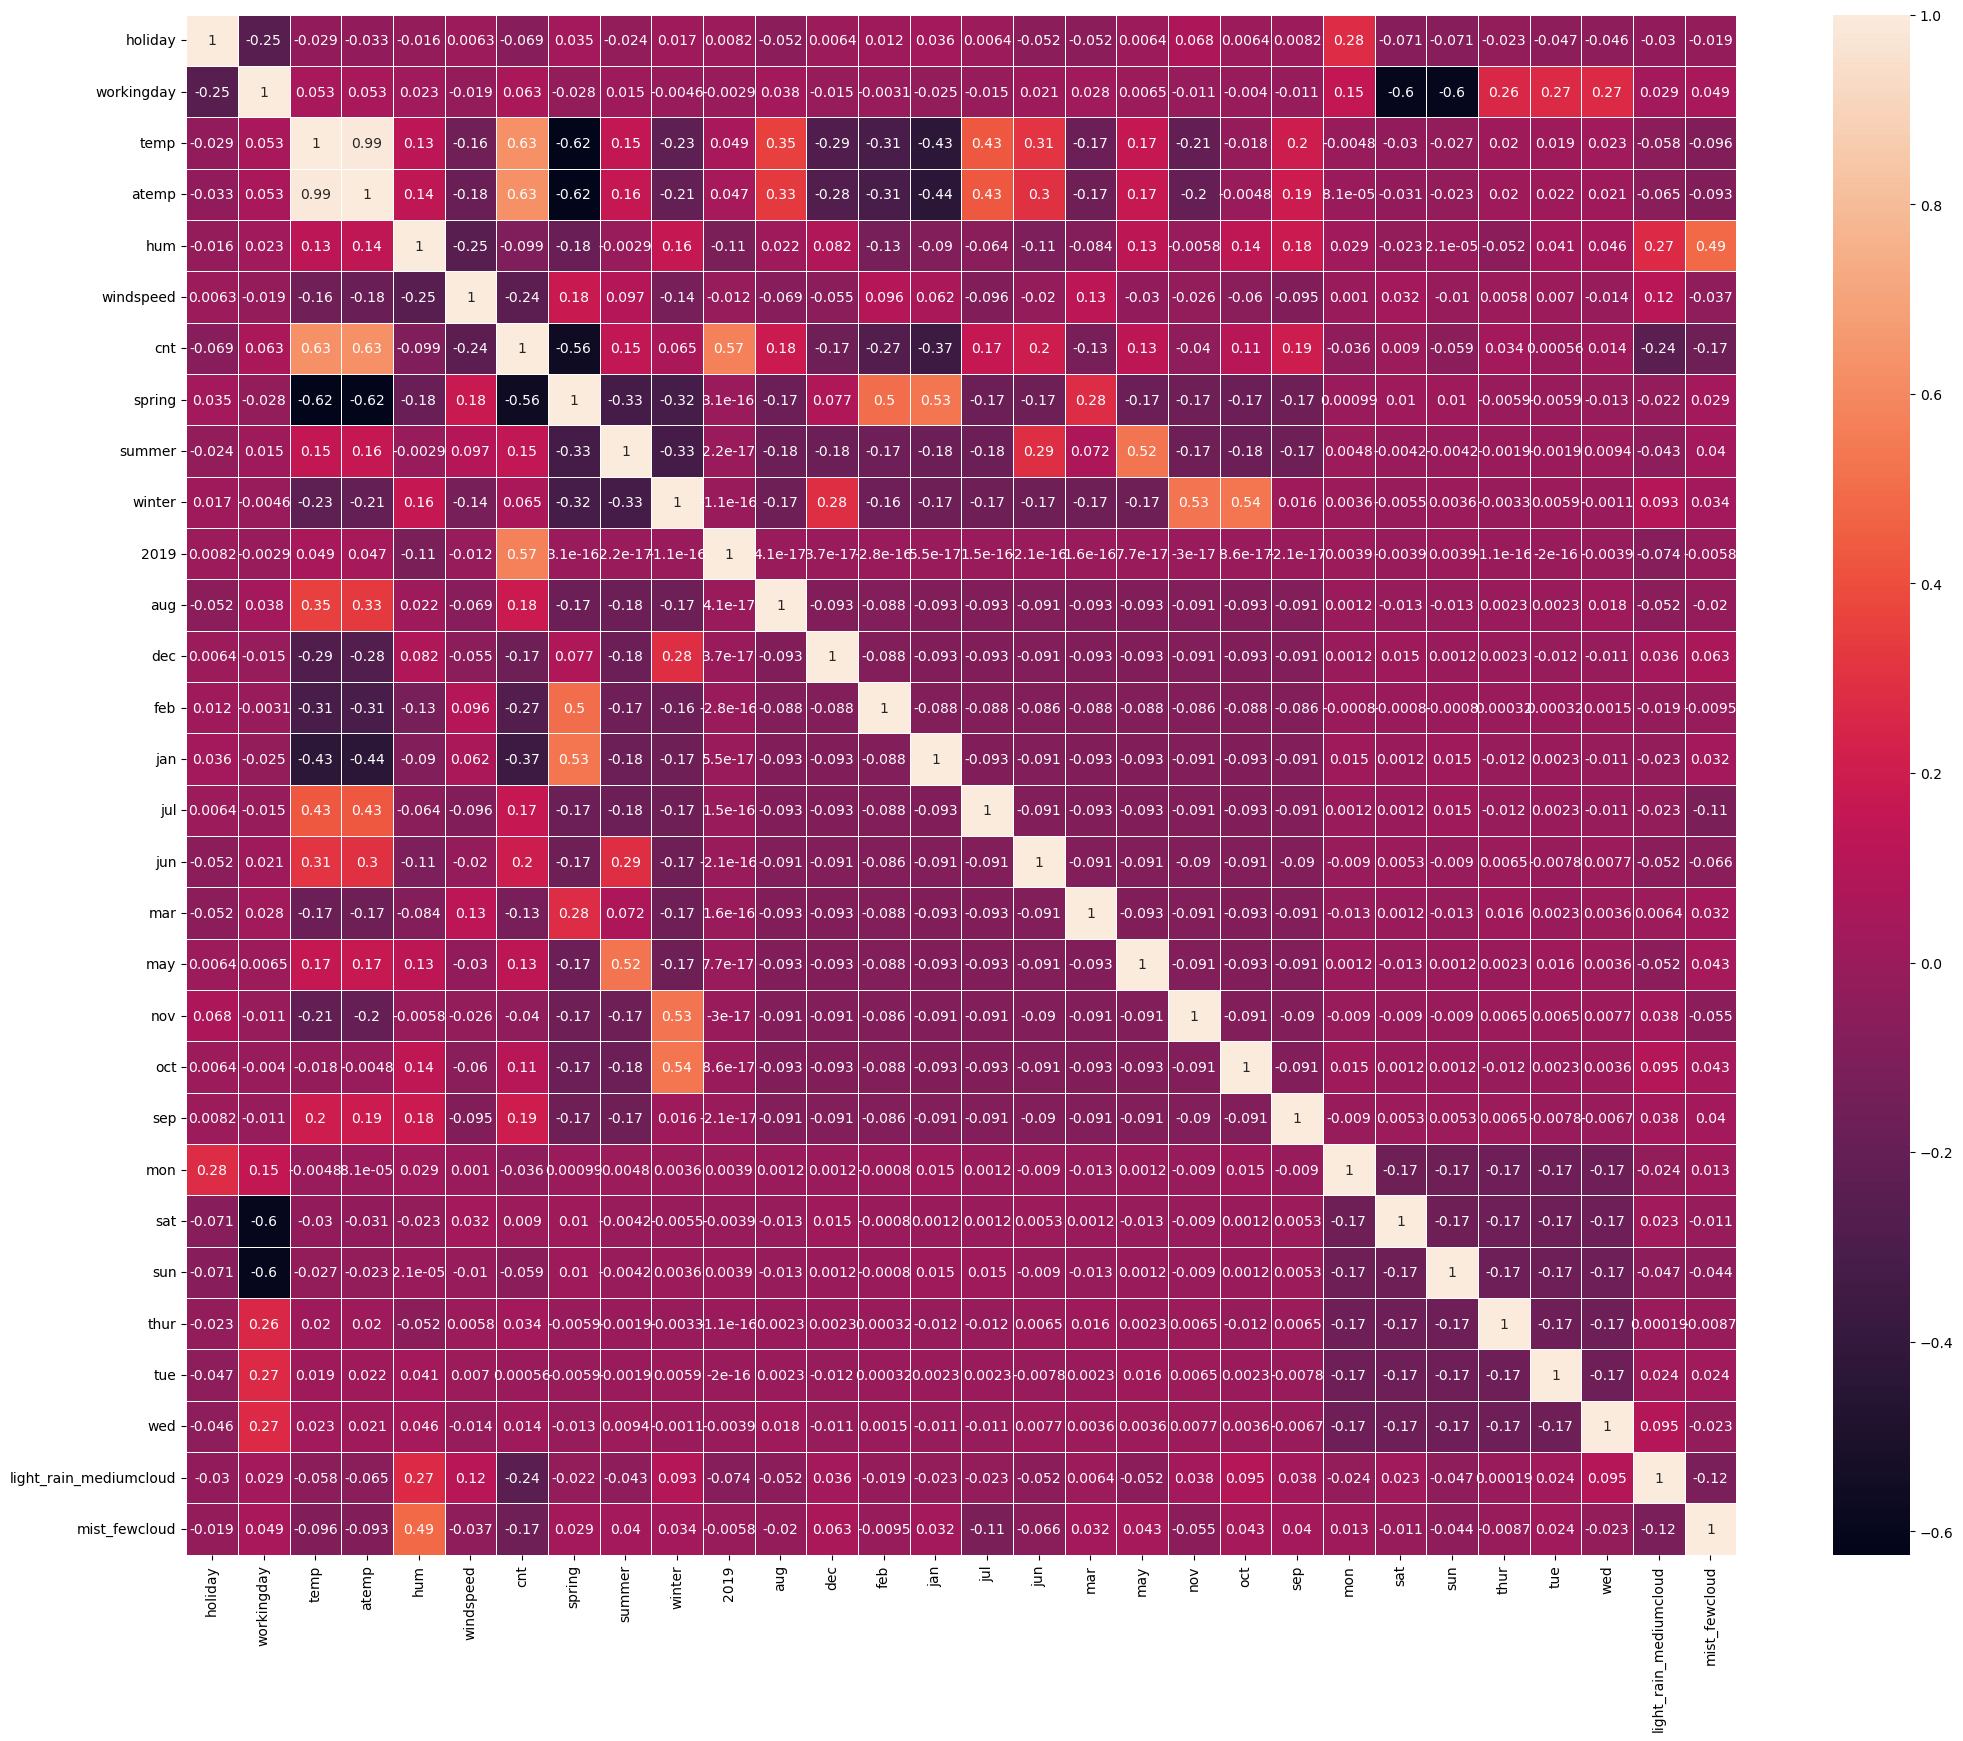

In [80]:
#Checking heatmap
fig, ax = plt.subplots(figsize=(25,20))         
sns.heatmap(day.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [81]:
#X_train and y_train generation
y_train=df_train.pop('cnt')
X_train=df_train

In [82]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
653,0,1,0.509875,0.501181,0.575330,0.300930,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815254,0.766343,0.725680,0.264678,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442419,0.438960,0.640148,0.255374,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245214,0.200315,0.498042,0.663138,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395624,0.391966,0.504534,0.188643,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [83]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### Now we will perform the following below steps
- statistical significent of the variable
- if the variable is correlated with many other predictive variables then we want to check the vif value

#### Model 1 Initial model will all variables

In [98]:
#Add a constant

X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

const                     0.245904
holiday                   0.010836
workingday                0.097132
temp                      0.400644
atemp                     0.050898
hum                      -0.151650
windspeed                -0.184515
spring                   -0.048076
summer                    0.037949
winter                    0.105659
2019                      0.232202
aug                       0.015522
dec                      -0.046713
feb                      -0.033471
jan                      -0.063907
jul                      -0.039795
jun                      -0.002087
may                       0.024316
nov                      -0.042809
oct                       0.006712
sep                       0.081106
mon                      -0.021488
sat                       0.096246
sun                       0.041690
thur                     -0.009711
tue                      -0.019290
wed                      -0.005721
light_rain_mediumcloud   -0.256683
mist_fewcloud       

In [85]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.95
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.54e-181
Time:                        15:53:01   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     481   BIC:                            -875.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Checking VIF values as well

- VIF= 1/(1-R2)

In [92]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,85.62
2,temp,67.13
3,atemp,56.10
22,sat,19.72
23,sun,18.36
6,spring,10.80
8,winter,9.52
7,summer,8.31
18,nov,6.80
19,oct,6.59


##### Observation
- 1. Here you can see that the model is having multicollinearity issue.
- 2. There are multiple varibles where P value is more that .5 .
- 3. Now we will try removing variables one by one 

Here we see that mar has high P value so will remove it first


#### Model2 after removing mar variable

In [95]:
#Add a constant
X_train=X_train.drop("mar",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          8.30e-182
Time:                        17:22:38   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [96]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,74.94
2,temp,67.08
3,atemp,56.06
21,sat,17.23
22,sun,16.20
6,spring,9.70
8,winter,9.19
7,summer,8.01
10,aug,5.81
14,jul,5.18


#### Model 3 after removing jun variable

In [100]:
#Add a constant
X_train=X_train.drop("jun",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.93e-183
Time:                        17:27:35   Log-Likelihood:                 528.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [101]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,74.40
2,temp,61.14
3,atemp,55.04
20,sat,17.04
21,sun,16.03
8,winter,8.90
6,spring,8.77
7,summer,7.51
16,nov,4.77
17,oct,4.52


#### Model 4 after removing oct variable

In [102]:
#Add a constant
X_train=X_train.drop("oct",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.62e-184
Time:                        17:29:08   Log-Likelihood:                 527.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [103]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,72.14
2,temp,60.92
3,atemp,54.96
19,sat,16.54
20,sun,15.53
6,spring,8.60
7,summer,6.63
8,winter,6.36
0,holiday,3.97
10,aug,3.19


#### Model 5 after removing wed variable

In [104]:
#Add a constant
X_train=X_train.drop("wed",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.50e-185
Time:                        23:10:35   Log-Likelihood:                 527.89
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [105]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,70.17
2,temp,60.77
3,atemp,54.77
19,sat,16.51
20,sun,15.51
6,spring,8.60
7,summer,6.63
8,winter,6.36
0,holiday,3.92
10,aug,3.19


#### Model 6 after removing atemp variable

In [107]:
#Add a constant
X_train=X_train.drop("atemp",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.16e-186
Time:                        23:12:23   Log-Likelihood:                 527.82
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [108]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,70.14
18,sat,16.51
19,sun,15.50
5,spring,8.55
6,summer,6.57
7,winter,6.29
2,temp,4.92
0,holiday,3.91
9,aug,3.17
13,jul,2.81


#### Model 7 after removing holiday variable

In [109]:
#Add a constant
X_train=X_train.drop("holiday",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.16e-186
Time:                        23:15:19   Log-Likelihood:                 527.82
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [110]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,36.43
1,temp,24.26
0,workingday,20.83
4,spring,8.39
6,winter,6.72
5,summer,6.66
17,sat,5.91
18,sun,5.58
3,windspeed,5.13
8,aug,3.26


#### Model 8 after removing thur variable

In [111]:
#Add a constant
X_train=X_train.drop("thur",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          6.97e-187
Time:                        23:17:24   Log-Likelihood:                 527.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [112]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,36.38
1,temp,24.16
0,workingday,20.80
4,spring,8.36
6,winter,6.71
5,summer,6.65
17,sat,5.81
18,sun,5.49
3,windspeed,5.12
8,aug,3.26


#### Model 9 after removing aug variable

In [113]:
#Add a constant
X_train=X_train.drop("aug",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.23e-188
Time:                        23:19:51   Log-Likelihood:                 527.49
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [114]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,35.53
1,temp,22.62
0,workingday,19.86
4,spring,6.09
16,sat,5.52
17,sun,5.30
3,windspeed,5.10
6,winter,4.45
5,summer,3.75
10,jan,2.43


#### Model 10 after removing tue variable

In [115]:
#Add a constant
X_train=X_train.drop("tue",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.10e-188
Time:                        23:22:51   Log-Likelihood:                 526.85
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,35.43
1,temp,22.62
0,workingday,19.79
4,spring,6.09
16,sat,5.49
17,sun,5.26
3,windspeed,5.09
6,winter,4.44
5,summer,3.75
10,jan,2.43


#### Model 11 after removing mon variable

In [117]:
#Add a constant
X_train=X_train.drop("mon",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.62e-189
Time:                        23:23:52   Log-Likelihood:                 526.23
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [118]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,34.79
1,temp,22.49
0,workingday,19.10
4,spring,6.06
15,sat,5.11
3,windspeed,5.06
16,sun,4.89
6,winter,4.40
5,summer,3.71
10,jan,2.42


#### Model 12 after removing may variable

In [119]:
#Add a constant
X_train=X_train.drop("may",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.60e-190
Time:                        23:25:37   Log-Likelihood:                 525.14
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [120]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,34.69
1,temp,22.30
0,workingday,18.92
4,spring,6.05
14,sat,5.04
3,windspeed,4.99
15,sun,4.85
6,winter,4.40
5,summer,3.09
10,jan,2.42


#### Model 13 after removing feb variable

In [121]:
#Add a constant
X_train=X_train.drop("feb",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.69e-191
Time:                        23:28:12   Log-Likelihood:                 523.83
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [122]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,34.24
1,temp,21.57
0,workingday,18.83
4,spring,5.06
13,sat,5.03
3,windspeed,4.99
14,sun,4.83
6,winter,4.40
5,summer,3.08
16,mist_fewcloud,2.34


#### Model 14 after removing sun variable

In [123]:
#Add a constant
X_train=X_train.drop("sun",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.60e-191
Time:                        23:28:55   Log-Likelihood:                 521.90
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [124]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,31.14
1,temp,18.95
3,windspeed,4.77
0,workingday,4.76
4,spring,4.50
6,winter,4.11
5,summer,2.86
15,mist_fewcloud,2.32
7,2019,2.09
13,sat,1.86


#### Model 15 after removing hum variable

In [125]:
#Add a constant
X_train=X_train.drop("hum",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.80e-189
Time:                        23:29:32   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [126]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,6.92
0,workingday,4.73
2,windspeed,4.72
3,spring,3.09
5,winter,3.02
4,summer,2.32
6,2019,2.08
12,sat,1.86
10,nov,1.78
8,jan,1.67


#### Model 16 after removing temp variable

In [127]:
#Add a constant
X_train=X_train.drop("temp",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.03e-162
Time:                        23:30:00   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [128]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,windspeed,4.26
0,workingday,3.55
2,spring,3.03
4,winter,3.00
3,summer,2.25
5,2019,1.91
9,nov,1.76
7,jan,1.64
11,sat,1.63
13,mist_fewcloud,1.56


#### Model 17 after removing jul variable

In [131]:
#Add a constant
X_train=X_train.drop("jul",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.28e-163
Time:                        23:32:54   Log-Likelihood:                 446.88
No. Observations:                 510   AIC:                            -865.8
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [132]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,windspeed,4.08
0,workingday,3.30
4,winter,2.83
2,spring,2.77
3,summer,1.99
5,2019,1.88
8,nov,1.76
7,jan,1.64
10,sat,1.57
12,mist_fewcloud,1.56


#### Model 18 after removing winter variable

In [133]:
#Add a constant
X_train=X_train.drop("winter",axis=1)
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

# Fitting the model
# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.39e-164
Time:                        23:33:29   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [134]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,windspeed,3.92
0,workingday,3.20
2,spring,2.38
4,2019,1.87
3,summer,1.77
6,jan,1.63
9,sat,1.54
11,mist_fewcloud,1.54
7,nov,1.22
8,sep,1.20


### Final Conclusion 
After removing 18 variables the final model seems to looking fine now
- P value is under 0.05
- VIF is also under 5 for available variables
- There are no multicollinearity 

## Step 6: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

In [135]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

653    0.780774
576    0.787758
426    0.470838
728    0.297214
482    0.681519
111    0.389188
580    0.759124
500    0.765207
479    0.766752
472    0.656318
455    0.597501
636    0.827327
224    0.442319
458    0.740977
244    0.518265
627    0.863131
595    0.673333
140    0.529769
454    0.631577
162    0.445442
231    0.576735
688    0.619170
659    0.822496
696    0.656174
320    0.281206
534    0.754637
136    0.365268
568    0.798822
474    0.753896
206    0.527552
427    0.422526
288    0.436779
447    0.655497
259    0.507184
174    0.518527
267    0.498327
327    0.371455
402    0.557121
590    0.786213
609    0.738446
704    0.665228
376    0.329965
365    0.358343
15     0.114145
656    0.710269
639    0.492251
470    0.640996
561    0.788253
680    0.614603
591    0.785966
240    0.544302
597    0.826081
718    0.592621
115    0.434969
565    0.679611
154    0.528718
471    0.702655
241    0.558704
552    0.798002
651    0.683821
384    0.320941
315    0.419438
484    0

<Axes: ylabel='Density'>

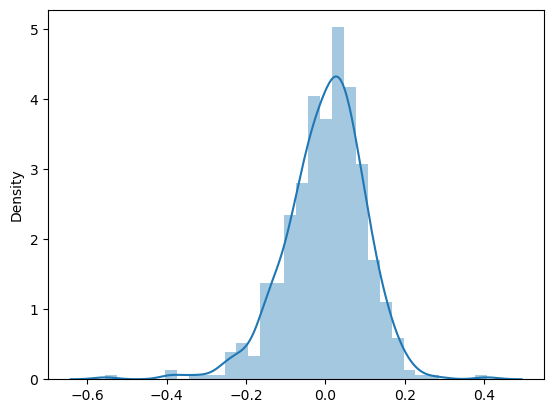

In [136]:
res=y_train-y_train_pred
sns.distplot(res)

## Step 7: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [137]:

num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#2 Fit on data
 # fit() - it will learn the max and min values (computes the max and min)
 # transform() -  after fit it is called to perform the operation x-xmin/xmax-xmin
 
 # fit_transform() - here both the above are done in a single go

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
184,1,0,0.831662,0.769756,0.657358,0.084376,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.901246,0.842741,0.610161,0.153994,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,1,0.512002,0.496193,0.837696,0.334296,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,1,0.881495,0.795484,0.437139,0.339750,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.817381,0.741664,0.314303,0.537376,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [138]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558972,0.533107,0.638521,0.313450,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,0.233671,0.217889,0.148978,0.159911,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046794,0.025991,0.261954,-0.042669,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354603,0.344841,0.527257,0.198588,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558797,0.549226,0.627782,0.299647,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759192,0.714229,0.743972,0.403272,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984503,0.981097,1.002164,0.807507,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
y_test=df_test.pop('cnt')
X_test=df_test

In [140]:
#Add a constant

X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thur,tue,wed,light_rain_mediumcloud,mist_fewcloud
184,1.0,1,0,0.831662,0.769756,0.657358,0.084376,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0,1,0.901246,0.842741,0.610161,0.153994,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,1,0.512002,0.496193,0.837696,0.334296,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,1,0.881495,0.795484,0.437139,0.339750,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,1,0.817381,0.741664,0.314303,0.537376,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [141]:
X_test_sm=X_test_sm.drop(['mar', 'jun', 'oct', 'wed', 'atemp', 'holiday', 'thur', 'aug', 
                          'tue', 'mon', 'may', 'feb', 'sun', 'hum', 'temp', 'jul', 'winter'],axis=1)


In [142]:
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

184    0.429629
535    0.768792
299    0.438503
221    0.527552
152    0.449186
404    0.537775
198    0.521123
171    0.449567
512    0.677525
200    0.563340
509    0.757728
559    0.716124
109    0.470016
467    0.751547
339    0.074838
589    0.799811
222    0.542262
40     0.280473
682    0.660872
453    0.668680
606    0.824288
265    0.543792
510    0.743062
19     0.077979
117    0.347219
423    0.538022
614    0.841003
163    0.443746
630    0.762593
191    0.493556
572    0.792889
662    0.714657
264    0.523210
625    0.673889
325    0.127842
114    0.493442
218    0.470033
678    0.729031
24     0.105361
432    0.356259
395    0.386563
48     0.262672
684    0.672677
203    0.565671
450    0.738443
538    0.791327
73     0.205950
269    0.527289
710    0.580012
98     0.434478
530    0.742832
173    0.421505
418    0.539073
503    0.790656
727    0.367406
550    0.775891
714    0.548762
448    0.577413
248    0.203206
685    0.678594
410    0.542905
201    0.428428
41     0

In [144]:
#evaluate the model by checking the R2 score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7832451175811741

## Final Result

#### As we can see the R-squared value for train is 0.798 and R-squared value for test is 0.783 which is quite close to the training set result so w can say that what the model has learned on the training set it also able to generalize very well on the test set

coefficient for final variables :
- const (constant)           : 0.5360    				
- workingday                 : 0.0570     				
- windspeed                  : -0.1927      				
- spring                     : -0.2381     				
- summer                     : -0.0403     				
- 2019                       : 0.2457     				
- dec                        : -0.1186      				
- jan                        : -0.1232     				
- nov                        : -0.1127      				
- sep                        : 0.0558      				
- sat                        : 0.0665      				
- light_rain_mediumcloud     : -0.3207      				
- mist_fewcloud              : -0.0901  				
